In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# KNN - K Nearest Neighbors - Classification

Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes).
More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level


In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train

,Gene One,Gene Two
611,6.4,6.6
530,5.2,2.5
2787,4.4,3.9
49,5.0,4.6
1883,2.9,5.0
...,...,...
1638,4.2,5.8
1095,6.6,4.7
1130,5.4,3.7
1294,5.5,7.2


In [8]:
y_train

611     0
530     1
2787    1
49      1
1883    0
       ..
1638    1
1095    1
1130    1
1294    0
860     1
Name: Cancer Present, Length: 2100, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
scaled_X_train

array([[ 0.4441672 ,  0.7149185 ],
       [-0.21108473, -1.66786641],
       [-0.64791935, -0.85423254],
       ...,
       [-0.10187607, -0.97046595],
       [-0.04727175,  1.06361873],
       [ 1.70006673, -0.21494878]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Evaluation

In [16]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.8955555555555555

In [20]:
confusion_matrix(y_test, y_pred)

array([[423,  47],
       [ 47, 383]], dtype=int64)

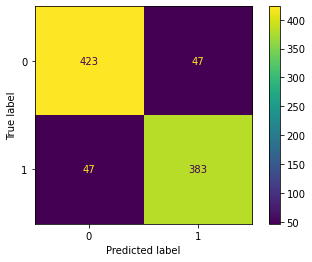

In [21]:
plot_confusion_matrix(knn,X_test,y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



# Elbow Method for Choosing Reasonable K Values

In [26]:
test_error_rate=[]

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred1= knn_model.predict(scaled_X_test)
    
    test_error = 1- accuracy_score(y_test, y_pred1)
    test_error_rate.append(test_error)

No handles with labels found to put in legend.


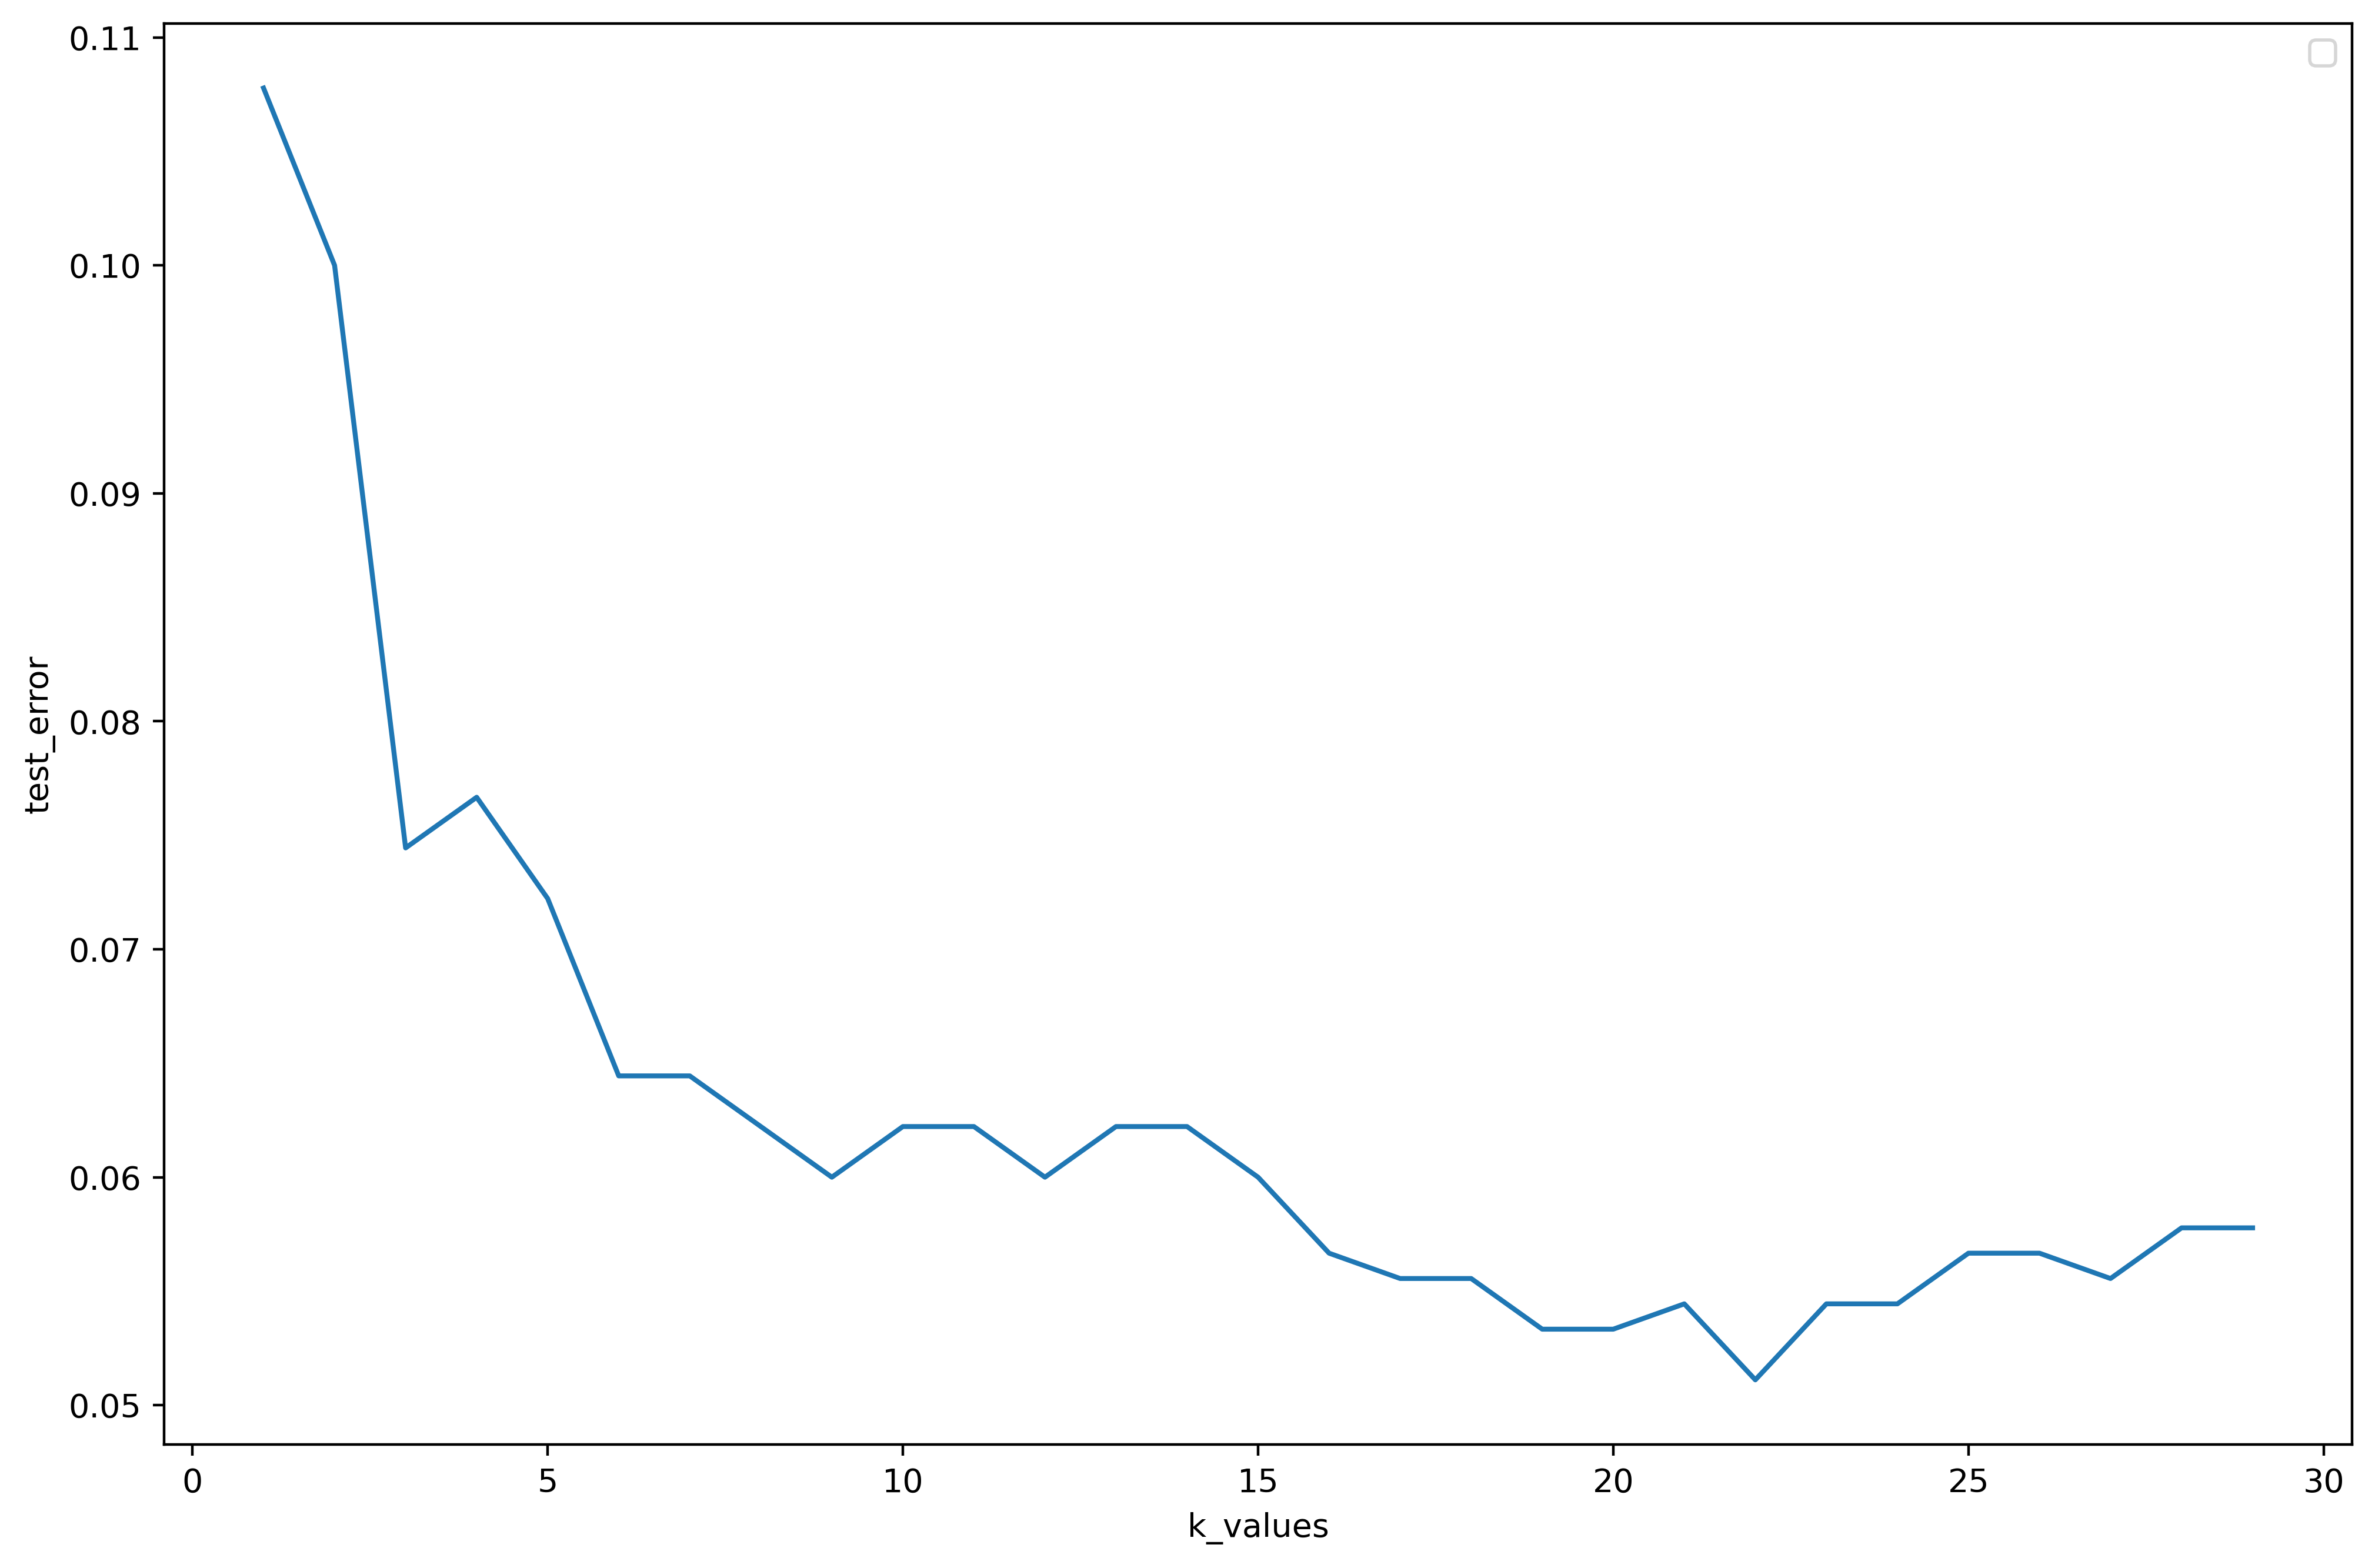

In [32]:
plt.figure(figsize=(12,8), dpi=400)
plt.plot(range(1,30), test_error_rate)
plt.xlabel('k_values')
plt.ylabel('test_error')
plt.legend()

From the above plot, we can choose k_value based on elbow method. Choosing k=6 can be a good options considering the trade-off between test_error and increasing k.